## 1. Get DAX30 stock information

### 1.1 Get data from yahoo finance

In [157]:
import yfinance as yf
import numpy as np
import pandas as pd

start_date = '2020-01-01'
end_date = '2020-12-31'

Constituent = list(pd.read_html('https://en.wikipedia.org/wiki/DAX')[3]['Ticker symbol'])
shares = {}
df = pd.DataFrame()

for ticker in Constituent:
    try:
        df[ticker] = yf.download(ticker, start = start_date, end = end_date)['Adj Close']
    except Exception as e:
        print('Failed to Download or merge : '+ticker)

    try:
        shares[ticker] = yf.Ticker(ticker).info['floatShares']
    except:
        print(ticker+' shares unfound')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [158]:
df

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,LIN.DE,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,ENR.DE,VOW3.DE,VNA.DE
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,282.808960,199.297836,56.796947,67.664925,67.103531,106.563087,36.732780,46.210567,70.800003,7.347,...,183.156754,102.388107,249.554581,244.415070,24.180037,116.524338,111.622742,NaN,170.062805,44.188805
2020-01-03,283.196991,197.093414,55.948612,66.799789,66.289818,104.347603,36.488937,45.373741,70.980003,7.250,...,178.579071,103.595512,249.264465,241.381744,24.072412,115.053452,109.477600,NaN,166.426010,44.353077
2020-01-06,280.965942,195.878738,55.116905,66.026680,66.045715,103.157463,34.738518,45.128704,67.500000,7.185,...,176.940720,104.706329,249.457870,241.473648,23.722628,114.193848,108.969536,NaN,166.407166,44.216187
2020-01-07,285.913055,196.328613,55.141865,66.385620,67.103531,105.391258,34.947525,45.489326,66.000000,7.434,...,178.579071,105.768852,253.615494,243.128204,24.260757,114.709610,109.665764,NaN,165.879547,44.453465
2020-01-08,293.770203,196.418594,54.667793,68.106697,67.275314,107.423637,35.557121,45.743610,66.000000,7.685,...,179.109085,107.507515,254.292328,243.587799,24.368383,115.397293,110.117378,NaN,166.595612,44.690746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,290.427246,186.759003,60.862122,46.462551,68.842400,118.400002,48.800888,55.634026,119.099998,8.786,...,204.756500,134.972565,205.945465,228.165558,32.372257,101.916939,111.397423,27.360001,145.434219,56.154770
2020-12-23,290.526184,191.217026,61.662819,46.404762,70.064568,121.650002,49.240891,57.480637,118.449997,8.983,...,207.017380,135.071579,215.482727,232.590363,32.927544,102.054634,113.988968,28.209999,148.911377,56.659794
2020-12-28,296.166504,193.819153,62.168015,46.790024,70.169601,123.050003,49.299553,57.608330,129.250000,9.218,...,210.064636,136.210388,212.701035,234.802765,34.116055,103.529984,116.229782,29.730000,149.204376,57.456177


### 1.2 Slice **price** and **market equity** data

In [159]:
# get price
PRC = df.copy()
PRC.drop(['ENR.DE'], axis=1, inplace=True) # ENR.DE is not listed in DAX30 until 2020-12, so drop it 

In [160]:
# get market equity
for ticker in df.columns:
    df[ticker] *= shares[ticker]

# market equity cutoff
cutoff = df.quantile(0.5, axis=1)
port_df = pd.DataFrame(columns=df.columns,index=df.index)
port_df[df.gt(cutoff,axis=0)] = 'Big'
port_df[df.le(cutoff,axis=0)] = 'Small'


ME_port = port_df.copy()
ME_port.drop(columns=['ENR.DE'],inplace=True)
ME_port = ME_port.iloc[13:,:]

In [161]:
df.head()

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,LIN.DE,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,ENR.DE,VOW3.DE,VNA.DE
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,4.898454e+10,8.265409e+10,5.215428e+10,6.647538e+10,2.903793e+10,1.146945e+10,6.881967e+09,3.728846e+10,1.051922e+10,1.328620e+10,...,9.373235e+10,1.323526e+10,1.292909e+10,3.422816e+10,1.577113e+10,1.215585e+11,8.955484e+10,NaN,3.993530e+10,2.541993e+10
2020-01-03,4.905175e+10,8.173986e+10,5.137529e+10,6.562545e+10,2.868581e+10,1.123100e+10,6.836283e+09,3.661320e+10,1.054597e+10,1.311079e+10,...,9.138967e+10,1.339134e+10,1.291406e+10,3.380337e+10,1.570093e+10,1.200241e+11,8.783380e+10,NaN,3.908128e+10,2.551443e+10
2020-01-06,4.866532e+10,8.123610e+10,5.061157e+10,6.486593e+10,2.858018e+10,1.110290e+10,6.508338e+09,3.641547e+10,1.002892e+10,1.299324e+10,...,9.055123e+10,1.353493e+10,1.292408e+10,3.381624e+10,1.547279e+10,1.191273e+11,8.742618e+10,NaN,3.907685e+10,2.543569e+10
2020-01-07,4.952219e+10,8.142267e+10,5.063449e+10,6.521856e+10,2.903793e+10,1.134333e+10,6.547496e+09,3.670647e+10,9.806054e+09,1.344353e+10,...,9.138967e+10,1.367228e+10,1.313948e+10,3.404794e+10,1.582378e+10,1.196654e+11,8.798476e+10,NaN,3.895296e+10,2.557218e+10
2020-01-08,5.088311e+10,8.145999e+10,5.019917e+10,6.690938e+10,2.911226e+10,1.156207e+10,6.661705e+09,3.691166e+10,9.806054e+09,1.389744e+10,...,9.166091e+10,1.389703e+10,1.317455e+10,3.411230e+10,1.589397e+10,1.203828e+11,8.834709e+10,NaN,3.912111e+10,2.570868e+10


## 2. Calculate Momentum

### 2.1 get momentum according to formula

In [110]:
RET = PRC.pct_change()
tmp_RET = (RET + 1)
tmp_RET = tmp_RET.iloc[1:, :] # delete the first one since it has no return

In [111]:
MOM = tmp_RET.rolling(11).apply(np.prod).shift(2)

In [112]:
MOM = MOM.apply(pd.to_numeric)
L_cutoff = pd.to_numeric(MOM.quantile(.3,axis=1,numeric_only=False))
H_cutoff = pd.to_numeric(MOM.quantile(.7,axis=1,numeric_only=False))

In [113]:
WL_port = pd.DataFrame(index=RET.index, columns=RET.columns)
WL_port[MOM.gt(H_cutoff, axis=0)] = 'Winner'
WL_port[(MOM.le(H_cutoff, axis=0)) & (MOM.ge(L_cutoff, axis=0))] = 'Neutral'
WL_port[MOM.lt(L_cutoff, axis=0)] = 'Loser'
WL_port.tail()

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,IFX.DE,LIN.DE,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,VOW3.DE,VNA.DE
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-22,Winner,Loser,Winner,Neutral,Loser,Neutral,Winner,Neutral,Winner,Loser,...,Winner,Neutral,Loser,Loser,Neutral,Loser,Neutral,Winner,Winner,Winner
2020-12-23,Winner,Loser,Winner,Neutral,Loser,Neutral,Winner,Loser,Winner,Loser,...,Neutral,Winner,Neutral,Loser,Loser,Loser,Neutral,Neutral,Winner,Winner
2020-12-28,Winner,Loser,Winner,Neutral,Loser,Winner,Winner,Loser,Winner,Loser,...,Winner,Neutral,Neutral,Neutral,Loser,Loser,Neutral,Neutral,Winner,Winner
2020-12-29,Winner,Neutral,Winner,Neutral,Loser,Winner,Winner,Neutral,Winner,Loser,...,Winner,Neutral,Loser,Winner,Neutral,Loser,Neutral,Neutral,Winner,Winner
2020-12-30,Winner,Neutral,Neutral,Neutral,Loser,Winner,Loser,Neutral,Winner,Loser,...,Winner,Winner,Loser,Neutral,Loser,Winner,Neutral,Winner,Neutral,Winner


### 2.2 Set rebalance rule

Since the momentum will be updated everyday, and market equity will not change significantly,   
we decide to only get momentum data on the last day of every month. 

In [114]:
WL_port.index = pd.to_datetime(WL_port.index, format='%Y%m%d', errors='ignore')+ pd.offsets.MonthEnd(0)

# store 2020 Feb and months other than Feb's date
other_list = []
feb_list = []

feb = pd.DataFrame()
other = pd.DataFrame()

for i in PRC.index:
    if i.month == 2:
        feb_list.append(i)
    else:
        other_list.append(i)

feb = WL_port[WL_port.index.month == 2]
other = WL_port[WL_port.index.month != 2]

feb.index = feb_list
other.index = other_list

In [115]:
# merge the two dataframes (Feb and Non-Feb)
WL_port = other.merge(feb, how='outer')

# then revise the index to the correct order (Jan, Feb, Mar,....)
all_date = feb_list + other_list
all_date.sort()
WL_port.index = all_date

WL_port.dropna(inplace=True)

### 2.3 combine two cut-off portfolio

In [116]:
ME_MOM_port = ME_port + WL_port
ME_MOM_port.head(5)

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,IFX.DE,LIN.DE,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,VOW3.DE,VNA.DE
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,BigWinner,BigNeutral,BigLoser,BigNeutral,BigLoser,SmallLoser,SmallLoser,BigLoser,SmallLoser,SmallWinner,...,SmallNeutral,BigNeutral,SmallWinner,SmallWinner,BigNeutral,SmallWinner,BigWinner,BigLoser,BigNeutral,BigWinner
2020-01-22,BigWinner,BigNeutral,BigLoser,BigWinner,BigLoser,SmallLoser,SmallLoser,BigLoser,SmallLoser,SmallNeutral,...,SmallNeutral,BigNeutral,SmallWinner,SmallWinner,BigNeutral,SmallWinner,BigWinner,BigLoser,BigNeutral,BigNeutral
2020-01-23,BigWinner,BigLoser,BigLoser,BigWinner,BigLoser,SmallLoser,SmallNeutral,BigLoser,SmallLoser,SmallNeutral,...,SmallNeutral,BigNeutral,SmallWinner,SmallWinner,BigNeutral,SmallWinner,BigWinner,BigLoser,BigNeutral,BigNeutral
2020-01-24,BigWinner,BigLoser,BigLoser,BigNeutral,BigLoser,SmallLoser,SmallNeutral,BigLoser,SmallWinner,SmallNeutral,...,SmallNeutral,BigNeutral,SmallWinner,SmallWinner,BigNeutral,SmallWinner,BigWinner,BigLoser,BigNeutral,BigNeutral
2020-01-27,BigNeutral,BigNeutral,BigLoser,BigNeutral,BigLoser,SmallLoser,SmallLoser,BigLoser,SmallWinner,SmallNeutral,...,SmallNeutral,BigNeutral,SmallWinner,SmallWinner,BigNeutral,SmallWinner,BigNeutral,BigLoser,BigNeutral,BigWinner


## 3. Backtest our strategy (time frame: 2020.01-2021.12)

### 3.1 Stimulate real world trading

In [117]:
ME_lag = df.shift(1)
unique_port = ['SmallLoser', 'SmallNeutral', 'SmallWinner', 'BigLoser','BigNeutral', 'BigWinner']

RET_port = pd.DataFrame(index=RET.index, columns=unique_port)
N_firm = pd.DataFrame(index=RET.index, columns=unique_port)

for p in unique_port:
  TMP_RET = RET[ME_MOM_port==p].apply(pd.to_numeric)
  TMP_ME = ME_lag[ME_MOM_port==p].apply(pd.to_numeric)
  TMP_PROD = TMP_RET*TMP_ME
  RET_port[p] = TMP_PROD.sum(axis=1)/TMP_ME.sum(axis=1)
  N_firm[p] = TMP_RET.count(axis=1)

RET_port = RET_port.dropna()
RET_port.tail()


,SmallLoser,SmallNeutral,SmallWinner,BigLoser,BigNeutral,BigWinner
Date,,,,,,
2020-12-22,0.017772,0.010888,0.011570,0.015480,0.012110,0.000000
2020-12-23,0.014929,0.005234,0.016548,0.015326,0.012172,0.010667
2020-12-28,0.008051,0.031121,0.015474,0.015758,0.011324,0.017188
2020-12-29,0.010827,-0.010268,0.001266,-0.006325,0.000618,0.003349
2020-12-30,-0.002185,0.000455,-0.007354,-0.003767,-0.001994,-0.005080


### 3.2 Visualization of our strategy (backtesting)

Text(0.5, 1.0, 'Backtest: Momentum-Market Equity Strategy on DAX30')

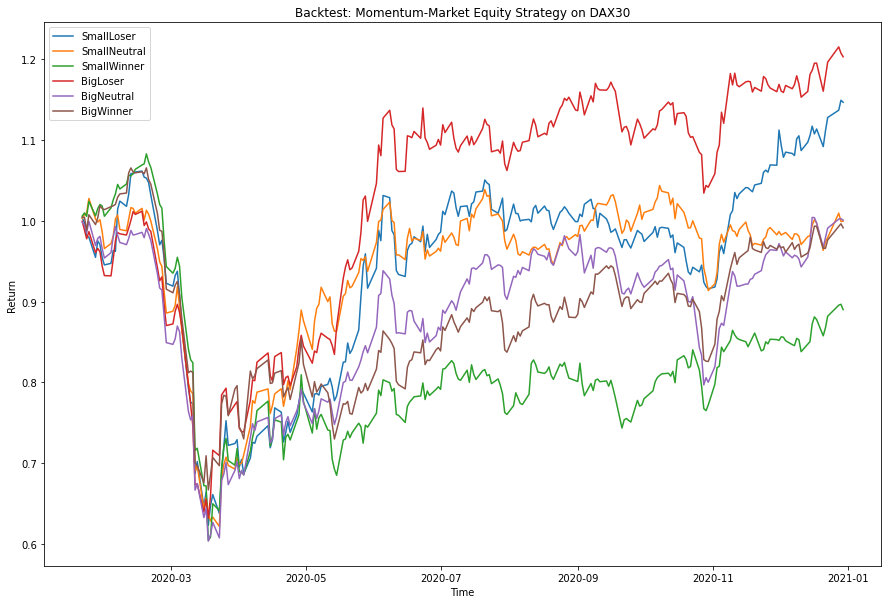

In [152]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

tmp = (RET_port.dropna()+1).cumprod()

ax.plot(tmp, label=unique_port)
ax.legend(loc='best')
ax.set_xlabel('Time')
ax.set_ylabel('Return')
ax.set_title('Backtest: Momentum-Market Equity Strategy on DAX30')

## 4. Tracing **out-of-sample** performance from 2021.01 to now

[Explanation]
After backtesting the data for one year, we define our strategy as:  
- **Long ```BigLoser```, ```SmallNeutral```, ```BigNeutral```** (top 3 best performers on 2020), **Short ```SamllLoser```, ```SmallWinner```, ```BigWinner```** (worst 3 performers on 2020)
- How to determine weight: the weight on 2020-12-30   
- How to rank the stocks: the ranking on 2020-12-30
  

### 4.1 Identify the weight of each stock on 2020-12-30

In [119]:
# get the 2020-12-30 rank
last_rank = ME_MOM_port.iloc[-1:, ]

In [120]:
last_rank.values

array([['BigLoser', 'BigNeutral', 'BigLoser', 'BigLoser', 'BigNeutral',
        'SmallWinner', 'SmallWinner', 'BigNeutral', 'SmallLoser',
        'SmallLoser', 'SmallWinner', 'BigLoser', 'BigWinner',
        'SmallWinner', 'SmallWinner', 'SmallNeutral', 'SmallWinner',
        'SmallLoser', 'SmallNeutral', 'BigNeutral', 'BigNeutral',
        'SmallNeutral', 'SmallLoser', 'BigNeutral', 'SmallWinner',
        'BigNeutral', 'BigLoser', 'BigNeutral', 'BigWinner']],
      dtype=object)

In [121]:
# calculate the weights (using our strategy) on 2021-12-30
df.iloc[-1,:] / df.iloc[-1,:].sum(axis=0)

ADS.DE     0.046348
ALV.DE     0.074765
BAS.DE     0.053382
BAYN.DE    0.042494
BMW.DE     0.028076
CON.DE     0.011722
1COV.DE    0.008495
DAI.DE     0.041887
DHER.DE    0.016949
DBK.DE     0.014536
DB1.DE     0.022951
DPW.DE     0.035384
DTE.DE     0.055105
DWNI.DE    0.001776
EOAN.DE    0.018000
FRE.DE     0.013927
FME.DE     0.012171
HEI.DE     0.008116
HEN3.DE    0.022737
IFX.DE     0.036693
LIN.DE     0.097915
MRK.DE     0.016296
MTX.DE     0.009931
MUV2.DE    0.030488
RWE.DE     0.020253
SAP.DE     0.100464
SIE.DE     0.084692
ENR.DE     0.011415
VOW3.DE    0.032150
VNA.DE     0.030879
Name: 2020-12-30 00:00:00, dtype: float64

### 4.2 Identify the **good** stock of each stock on 2020-12-30

Definition: Any stock that belongs to ```BigLoser```, ```SmallNeutral```, ```BigNeutral``` is **good** stock

In [122]:
last_rank.T.head(5)

Date,2020-12-30
ADS.DE,BigLoser
ALV.DE,BigNeutral
BAS.DE,BigLoser
BAYN.DE,BigLoser
BMW.DE,BigNeutral


In [123]:
# identify stocks that we are going to long
filter_ = (last_rank.T['2020-12-30'] == 'BigLoser') | (last_rank.T['2020-12-30'] == 'SmallNeutral') | (last_rank.T['2020-12-30'] == 'SmallLoser') 
good_rank = list(last_rank.T[filter_].index)

In [126]:
last_date = df.iloc[-1:]
last_date

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,LIN.DE,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,ENR.DE,VOW3.DE,VNA.DE
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-30,5.159842e+10,8.323560e+10,5.942970e+10,4.730843e+10,3.125632e+10,1.305021e+10,9.457539e+09,4.663219e+10,1.886923e+10,1.618323e+10,...,1.090082e+11,1.814243e+10,1.105597e+10,3.394189e+10,2.254785e+10,1.118459e+11,9.428621e+10,1.270805e+10,3.579229e+10,3.437738e+10


In [127]:
good_weights = {} # store the weight for each stock
sum_me = 0
last_date = df.iloc[-1:]

for c in df.columns:
  if c in good_rank:
    me = last_date[c]
    sum_me += me # calculate total market equity

for c in df.columns:
  if c in good_rank:
    good_weights[c] = last_date[c] / sum_me # calculate the value-weighted weight

In [129]:
good_weights['ADS.DE'].values[0] # weight for ADS.DE


0.12705223322701575

In [130]:
# make sure the weights add up to 1
sum = 0
for i in good_weights:
  sum += good_weights[i].values[0]
sum 

1.0

### 4.2 Identify the **bad** stock of each stock on 2020-12-30

Definition: Any stock that belongs to ```SamllLoser```, ```SmallWinner```, ```BigWinner``` is **bad** stock

In [131]:
filter_ = (last_rank.T['2020-12-30'] == 'BigNeutral') | (last_rank.T['2020-12-30'] == 'BigWinner') | (last_rank.T['2020-12-30'] == 'SmallWinner') 
bad_rank = list(last_rank.T[filter_].index)

In [132]:
bad_weights = {}
sum_me = 0
last_date = df.iloc[-1:]

for c in df.columns:
  if c in bad_rank:
    me = last_date[c]
    sum_me += me 

for c in df.columns:
  if c in bad_rank:
    bad_weights[c] = last_date[c] / sum_me

In [133]:
sum = 0
for i in bad_weights:
  sum += bad_weights[i].values[0]
sum

0.9999999999999999

## 5. Plot the out-of-sample performance

### 5.1 Get the weight all together (good and bad stocks' weight)

In [164]:
# merge the two dicts
for ticker, value in (good_weights.items()):
  bad_weights[ticker] = value

weights = bad_weights

In [165]:
len(good_rank)

12

### 5.2 Get the price data from 2021-01-01 to 2021-12-22

In [142]:
start_date = '2021-01-01'
end_date = '2021-12-22'
#data = yf.download('DAX',start='2017-01-01',end='2021-01-01')

Constituent = list(pd.read_html('https://en.wikipedia.org/wiki/DAX')[3]['Ticker symbol'])
shares = {}
df_2021 = pd.DataFrame()
for ticker in Constituent:
    try:
        df_2021[ticker] = yf.download(ticker, start = start_date, end = end_date)['Close']
    except Exception as e:
        print('Failed to Download or merge : '+ticker)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [143]:
# get the daily return 
ret_2021 = df_2021.pct_change()
ret_2021 = ret_2021.iloc[1:,]
ret_2021.drop(columns=['ENR.DE'], inplace=True)

### 5.3 Get the weight dataframe

In [166]:
weight_df = pd.DataFrame(np.nan, index=ret_2021.index, columns=ret_2021.columns)
weight_df.head(2)

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,IFX.DE,LIN.DE,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,VOW3.DE,VNA.DE
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
# weight_df will store the weight of the stocks 
for c in weight_df:
  for k, v in weights.items():
    if c == k: # e.g. if 
      weight_df[c] = v[0] 

In [170]:
weight_df.tail()

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,IFX.DE,LIN.DE,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,VOW3.DE,VNA.DE
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-15,0.127052,0.119856,0.146335,0.116489,0.045008,0.018792,0.013619,0.067149,0.046462,0.039848,...,0.058823,0.156968,0.044673,0.027223,0.048875,0.032468,0.161054,0.232164,0.05154,0.049502
2021-12-16,0.127052,0.119856,0.146335,0.116489,0.045008,0.018792,0.013619,0.067149,0.046462,0.039848,...,0.058823,0.156968,0.044673,0.027223,0.048875,0.032468,0.161054,0.232164,0.05154,0.049502
2021-12-17,0.127052,0.119856,0.146335,0.116489,0.045008,0.018792,0.013619,0.067149,0.046462,0.039848,...,0.058823,0.156968,0.044673,0.027223,0.048875,0.032468,0.161054,0.232164,0.05154,0.049502
2021-12-20,0.127052,0.119856,0.146335,0.116489,0.045008,0.018792,0.013619,0.067149,0.046462,0.039848,...,0.058823,0.156968,0.044673,0.027223,0.048875,0.032468,0.161054,0.232164,0.05154,0.049502
2021-12-21,0.127052,0.119856,0.146335,0.116489,0.045008,0.018792,0.013619,0.067149,0.046462,0.039848,...,0.058823,0.156968,0.044673,0.027223,0.048875,0.032468,0.161054,0.232164,0.05154,0.049502


### 5.4 Visualization of our strategy (out-of-sample)

In [151]:
# calculate return
res_df = weight_df * ret_2021
res_df.sum(axis=1)

Date
2021-01-05   -0.010514
2021-01-06    0.038180
2021-01-07    0.013310
2021-01-08    0.009764
2021-01-11   -0.016501
                ...   
2021-12-15    0.002869
2021-12-16    0.020189
2021-12-17   -0.012171
2021-12-20   -0.040145
2021-12-21    0.026121
Length: 248, dtype: float64

Text(0.5, 1.0, 'Out of Sample: LONG top three SHORT last three strategy')

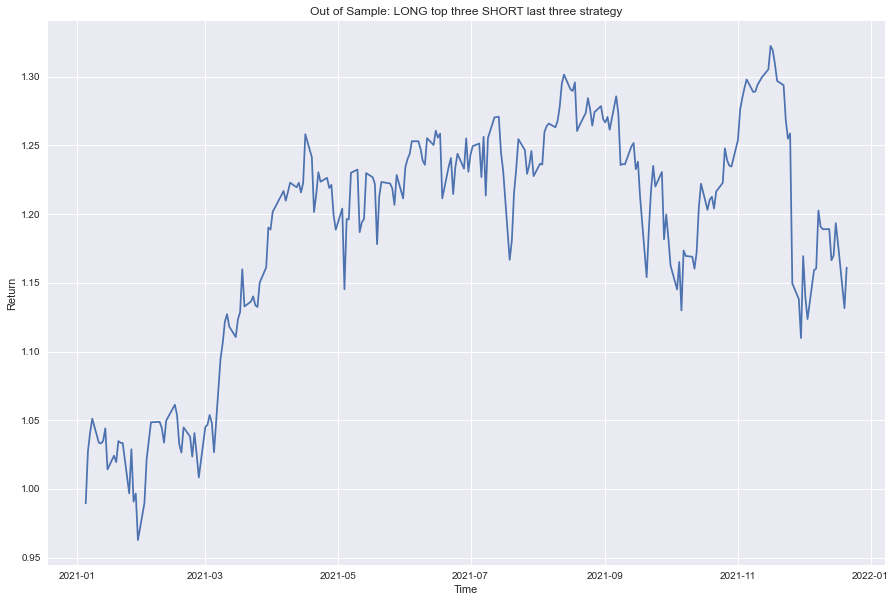

In [156]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

tmp = 1 * ((res_df).sum(axis=1) + 1).cumprod()

ax.plot(tmp)
ax.set_xlabel('Time')
ax.set_ylabel('Return')
ax.set_title('Out of Sample: LONG top three SHORT last three strategy')

## 6. Performance Evaluation

In [154]:
final_res = 1 * ((res_df).sum(axis=1) + 1).cumprod()

In [155]:
VAR = (res_df.sum(axis=1) * 100 ).var()
MEAN = (res_df.sum(axis=1) * 100 ).mean()

### 6.1 Sharpe Ratio (assume rik-free rate = 0%)

In [311]:
# Sharpe Raito
# risk-free: 0%

SR = (MEAN-0) / (VAR)**0.5
SR